<a href="https://colab.research.google.com/github/schmellerl/gradient_flows_order_parameters_mechanics/blob/main/colab/Example3_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# put in a separate file
try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl
    import dolfin
else:
    try:
        import ufl
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl
        import dolfin

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

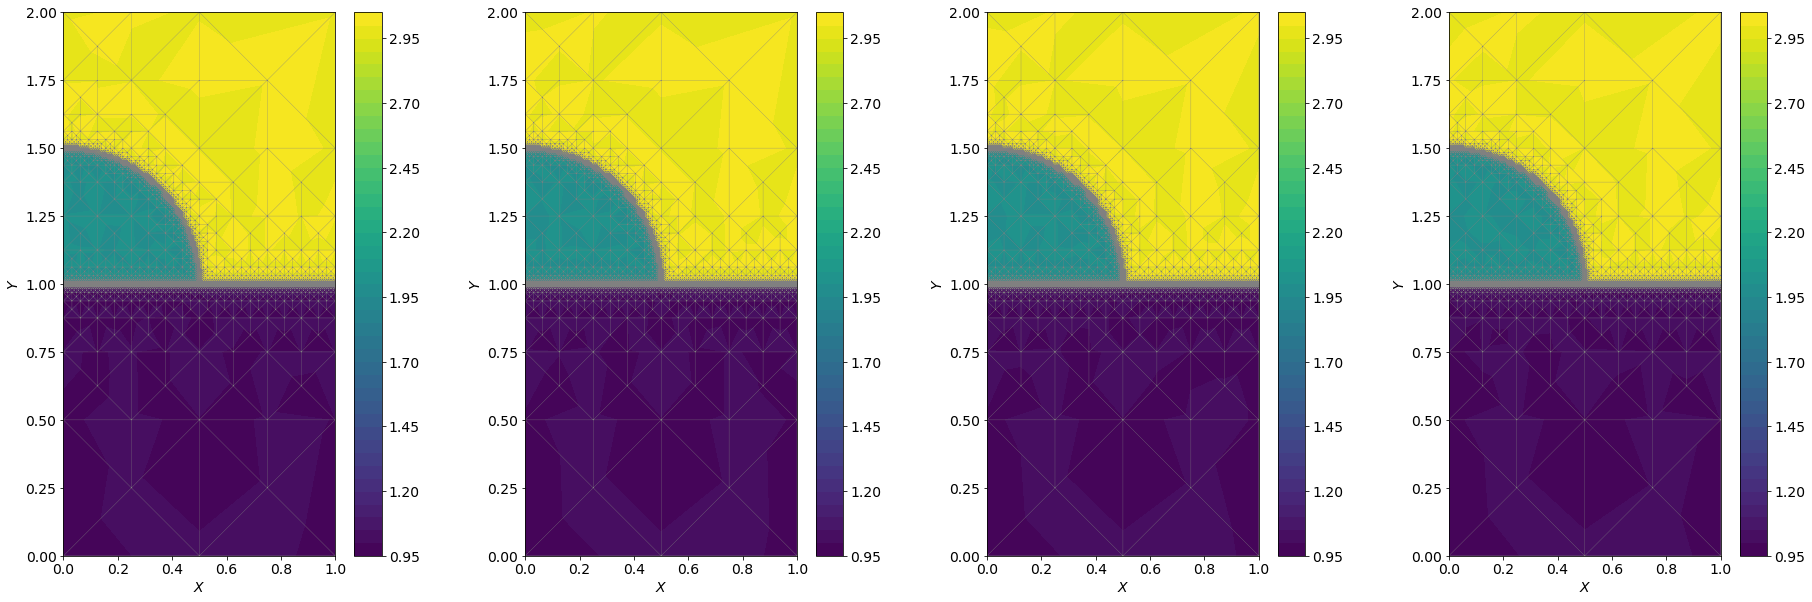

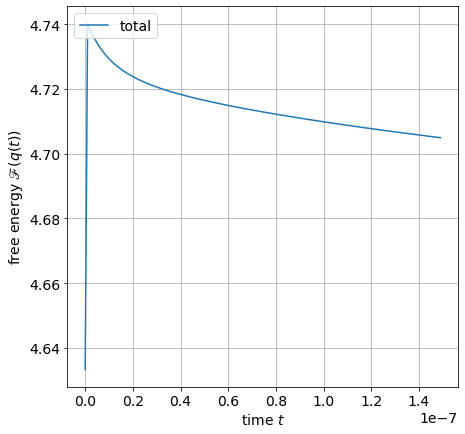

In [ ]:
from fenics import *
from matplotlib import pyplot as plt
import numpy as np


filepath = '/content/drive/MyDrive/ColabNumerics/Example3/'

plt.rcParams.update({'font.size': 14})

E = np.load(filepath + "energies.npy")
mesh = Mesh(filepath + "mesh.xml")

Vu    = FunctionSpace(mesh,VectorElement("P", mesh.ufl_cell(), 1))
Vpsi  = FunctionSpace(mesh,FiniteElement("P", mesh.ufl_cell(), 1))
U     = FunctionSpace(mesh,FiniteElement("P", mesh.ufl_cell(), 1))


m = 0
plt.figure(figsize=(4*10,10))
for i in [1,20,100,149]:
  m += 1
  psi1 = Function(Vpsi,filepath + "psi1"+str(i)+".xml")
  psi2 = Function(Vpsi,filepath + "psi2"+str(i)+".xml")
  u    = Function(Vu  ,filepath + "u"+str(i)+".xml")
  psi3 = project(-1-psi1-psi2,Vpsi)
  psi4 = project( (1+psi1)/2 + 2*(1+psi2)/2 + 3*(1+psi3)/2 ,Vpsi)
  ALE.move(mesh,u)
  plt.subplot(1,5,m)
  A = plot(psi4)
  plt.colorbar(A)
  # plot(u)
  plot(mesh,linewidth=0.3)
  ALE.move(mesh,project(-u,Vu))
  #plt.title("time $t="+f"{E[1][i]:.4f}"+"$")
  plt.xlabel("$X$")
  plt.ylabel("$Y$")

plt.savefig(filepath + "EX1_FIG1.jpeg",dpi=800)

plt.figure(figsize=(7,7))
plt.plot(E[1],E[2],label = "total")
plt.grid(True)
plt.xlabel("time $t$")
plt.ylabel("free energy $\mathscr{F}(q(t))$")
plt.legend(loc="upper left")
plt.savefig(filepath + "EX2_FIG2.pdf")